## Simple Car Environment
---

![simple_car.gif](https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExODU0NmVlMzU1MGU1YzJjMjA5ODE5NjM0MTg0MTU1ZmM1OTA1NzRkNCZjdD1n/VI3OuvQShK3gzENiVz/giphy.gif)

*(code for this tutorial adapted from: https://gerardmaggiolino.medium.com/creating-openai-gym-environments-with-pybullet-part-2-a1441b9a4d8e*)

---

This is a simple car environment with a continuous state space and discrete action space with the goal of driving towards a green marker. Driving within 1.5 metres of the green marker causes the episode to end or if a certain amount of time has passed.

We can instantiate the environment as follows:


```
env = gym.make('SimpleDriving-v0', apply_api_compatibility=True, renders=False, isDiscrete=True, render_mode='tp_camera')
```


### Action Space

*   0: Reverse-Left
*   1: Reverse
*   2: Reverse-Right
*   3: Steer-Left (no throttle)
*   4: No throttle and no steering
*   5: Steer-Right (no throttle)
*   6: Forward-right
*   7: Forward
*   8: Forward-left

### Observation Space
Two dimensional array with distance in (x, y) from goal position.

###Rewards
Negative euclidean distance from the goal.

### Interacting with the Environment
We can sample actions randomly, get the agent to perform that action and then observe how the environment state changes:
```
state = env.reset()  # this needs to be called once at the start before sending any actions
action = env.action_space.sample()
state, reward, done, _, info = env.step(action)
```


---

## Installing and Modifying Gym Environment Code

For installing in collab you would have already been familiar with using the following command:
```
pip install git+https://github.com/fredsukkar/simple-car-env-template
```

To edit the gym environment first create a github account and then go to https://github.com/fredsukkar/simple-car-env-template and create a new repository using the repository as a template as follows:
![sdlfk](https://i.ibb.co/MMsLv1G/github-template.jpg)


Once you have your own copy of the repository you can then edit the files in the browser via github or alternatively (recommended) you can [clone the repository](https://docs.github.com/en/repositories/creating-and-managing-repositories/cloning-a-repository) and modify the code locally.

To install the package from github you can use the usual:
```
pip install git+https://github.com/<your repo>
```

To install the package locally:
```
cd /path/to/cloned_repo
python setup.py install
```

Note that for both methods you will need to install the package again after you've made any changes for them to take any effect.

The main file you will be modifying is: https://github.com/fredsukkar/Gym-Medium-Post/blob/main/simple_driving/envs/simple_driving_env.py.

There are four main functions that you have been calling via the gym environment object:
```
class SimpleDrivingEnv(gym.Env):
    metadata = {'render.modes': ['human']}  
  
    def __init__(self):
        pass

    def step(self, action):
        pass

    def reset(self):
        pass

    def render(self):
        pass
```

Parts 3 and 4 of the assignment will ask you to modify one of these functions.

---

# Assignment 3: Reinforcement Learning
In this assignment you will apply the RL algorithms you learnt from the tutorials to a simulated robot car in a pybullet environment.

You will be asked to (percentages are allocation of assignment marks):
* Train the robot to drive to the green goal marker which spawns at random locations (60%)
* Modify the epsilon-greedy function to incorporate prior knowledge (20%)
* Modify the reward function (10%)
* Add obstacles to the environment (10%)

It is highly recommended to install pybullet and run your code locally since things will run much faster. It will also make editing the gym environment code easier.



Before we can execute any code we first need to install the following packages:

# Installations

In [1]:
!apt update
!pip install gym==0.26.2 pyvirtualdisplay pygame torch > /dev/null 2>&1
#!pip install git+https://github.com/fredsukkar/simple-car-env-template > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install -y xvfb

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,622 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [830 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,798 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,069 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http:

## Install from personal repositorty after changes

In [2]:
# Installing personal repository editing is performed in this directory.
!pip install git+https://github.com/eagle-Ji/working_dqn_01

  Cloning https://github.com/eagle-Ji/working_dqn_01 to /tmp/pip-req-build-1da7phb5
  Running command git clone --filter=blob:none --quiet https://github.com/eagle-Ji/working_dqn_01 /tmp/pip-req-build-1da7phb5
  Resolved https://github.com/eagle-Ji/working_dqn_01 to commit d8774f726686f21b4e9bde8aaba9c0062fd40c71
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 7.0 MB/s eta 0:00:00
  Created wheel for simple-driving: filename=simple_driving-0.0.1-py3-none-any.whl size=7992 sha256=53fe4a13c6edaa7a1475067aced7ae9e4ff2d49b6d12bc0cf3098a33444251dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-jiaglwhc/wheels/b8/da/64/cdbbbc0f7f72c15af57040678f9c83cb237e4aaefac8a1ef90
Successfully built simple-driving


Now import the necessary packages and following helper functions (you don't need the `display_video` function if running locally):

In [3]:
import gym
import simple_driving
# import pybullet_envs
import pybullet as p
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
from IPython.display import HTML
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import math
from collections import defaultdict
import pickle
from IPython.display import clear_output
import torch
import random

display = Display(visible=0, size=(400, 300))
display.start()

def display_video(frames, framerate=30):
  """Generates video from `frames`.

  Args:
    frames (ndarray): Array of shape (n_frames, height, width, 3).
    framerate (int): Frame rate in units of Hz.

  Returns:
    Display object.
  """
  height, width, _ = frames[0].shape
  dpi = 70
  orig_backend = matplotlib.get_backend()
  matplotlib.use('Agg')  # Switch to headless 'Agg' to inhibit figure rendering.
  fig, ax = plt.subplots(1, 1, figsize=(width / dpi, height / dpi), dpi=dpi)
  matplotlib.use(orig_backend)  # Switch back to the original backend.
  ax.set_axis_off()
  ax.set_aspect('equal')
  ax.set_position([0, 0, 1, 1])
  im = ax.imshow(frames[0])
  def update(frame):
    im.set_data(frame)
    return [im]
  interval = 1000/framerate
  anim = animation.FuncAnimation(fig=fig, func=update, frames=frames,
                                  interval=interval, blit=True, repeat=False)
  return HTML(anim.to_html5_video())

## Part 1

Train the robot to drive to the green goal marker. Use any of the RL algorithms you learnt in the tutorials.

You can save the model after training to save you having to retrain everytime you open colab:
```
from google.colab import drive
drive.mount('/content/drive')
torch.save(model.state_dict(), "/content/drive/My Drive/Colab Notebooks/simple_driving_qlearning.pkl")  # this will save to folder "Colab Notebooks" on your google drive
```

You can then load the model:
```
model.load_state_dict(torch.load("/content/drive/My Drive/Colab Notebooks/simple_driving_qlearning.pkl"))
```

Once loaded you can even continue your training again using the learnt weights, that way you don't have to start from scratch again if you decide you want to train for longer. But keep in mind the epsilon greedy function will start from completely random again so you might want to set epsilon starting value appropriately.

# Connect to google drive.

In [4]:
# Connect with your google drive for part 1.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 2

Incorporate prior knowledge into the epsilon-greedy function by choosing a non-uniform distribution to sample from when performing exploration. For example, for training flappy bird we used the following to sample flapping actions less often to avoid flying off into the sky during early stages of training:

```
return np.random.choice(np.array(range(2)), p=[0.9,0.1])
```

Note that you will need to change the parameters to suit the car's action space and also choose a suitable distribution.

## Part 3

Modify the reward to give a bonus of 50 if the goal is reached. You can do this either in the `simulate` function or directly by modifying the `step` function in the gym environment code.


## Part 4

Add obstacles to the environment. You can do this by modifying the `reset` function in the gym environment code. For example you can add objects as follows:
```
self.obstacle = self._p.loadURDF(fileName=<path to urdf file here>,
                   basePosition=[0, 0, 0])
```

An example urdf file: https://github.com/fredsukkar/simple-car-env-template/blob/main/simple_driving/resources/simplegoal.urdf

**Note:** you will need to add features to your state so that the agent learns to avoid obstacles. For example, you could add the x, y distance from the agent to the closest obstacle in the environment. Then your state would become: `[x_goal, y_goal, x_obstacle, y_obstacle]`.

---

Here is some code to help you get started.

In [ ]:
######################### renders image from third person perspective for validating policy ##############################
env = gym.make("SimpleDriving-v0", apply_api_compatibility=True, renders=False, isDiscrete=False, render_mode='tp_camera')
##########################################################################################################################

######################### renders image from onboard camera ###############################################################
# env = gym.make("SimpleDriving-v0", apply_api_compatibility=True, renders=False, isDiscrete=True, render_mode='fp_camera')
##########################################################################################################################

######################### if running locally you can just render the environment in pybullet's GUI #######################
# env = gym.make("SimpleDriving-v0", apply_api_compatibility=True, renders=True, isDiscrete=True)
##########################################################################################################################

state, info = env.reset()
frames = []
frames.append(env.render())

for i in range(500):
    action = env.action_space.sample()
    state, reward, done, _, info = env.step(action)
    print(state)
    frames.append(env.render())  # if running locally not necessary unless you want to grab onboard camera image
    if done:
        break

env.close()
display_video(frames, framerate=5)  # remove if runnning locally

# VERSION 2

# This code is not helping the agent to train. I have traied with this after changings but no benifit.
 If you want you can try with this code too.

In [ ]:
# THIS WORKS WITH ORIGINAL FRED'S REPOSITORY

import gym
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import random

# Create the environment
env = gym.make('SimpleDriving-v0', apply_api_compatibility=True, renders=False, isDiscrete=True, render_mode='tp_camera')
state_shape = env.observation_space.shape
state_size = np.prod(state_shape)
action_size = env.action_space.n

print(action_size, state_shape)

# Define the DQN agent class
class DQNAgent:
    def __init__(self, state_size, action_size):
        #print("Executing Init Function")
        self.state_size = state_size
        self.action_size = action_size
        self.memory = []  # Replay memory
        ''' Discount factor is kept closer to the 1 so that future bounus reward can be prefered.'''
        self.gamma = 0.898 #0.98 # Discount factor 899
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.000276
        self.learning_rate = 0.0004 #0.003 #0.004
        self.model = self._build_model()
        self.target_model = self._build_model()
        # Comment these two file when you run the training first time for 4K steps.
        #try:
        #self.load_model()
        #self.target_model.set_weights(self.model.get_weights())
        #print("Saved Model Loaded")
        #except:
        #  pass

    def _build_model(self):
        #print("Executing Build Model")
        '''
        If trained for 4000 episodes the number of neurons in each layer will be
        16, So far I have trained with a shallow network to try it for less episodes.
        If you want to test it with my model you will use 4 neurons.
        once you have trained your model you can keep whatever model you have selected.

        '''
        model = Sequential()
        model.add(Dense(16, input_dim=self.state_size, activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        #print("Executing Remember Function")
        self.memory.append((state, action, reward, next_state, done))

    # Model loading and saving. In this model is being saved with the episode number. Maximum number saved will
    # be the best weights.
    def save_model(self, e, mode_):
      self.model.save_weights("/content/drive/My Drive/Colab Notebooks/_"+str(mode_)+"_simple_driving_DQN_5_"+str(e)+".h5")
    def load_model(self):
      # You need to load your new weight file name. For final testing
      self.model.load_weights("/content/drive/My Drive/Colab Notebooks/_backup_weights_simple_driving_DQN_5_99.h5")

    def act(self, state):
        # This function can be used for testing purpose so that all actions are taken through the NN. or Agent Model.
        act_values = self.model.predict(state.reshape(1, -1),  verbose=0 )
        #print("Predicted action values:", act_values)
        return np.argmax(act_values[0])

    def act_with_probabilities(self, state, action_probabilities):
      # Even selecting the action with different given probabilities.
      # It is necessary that exploration and explotation balance is present for the agent.
        if np.random.rand() <= self.epsilon:
          action = np.random.choice(self.action_size, p=action_probabilities)
          return action
        else:
          #print(state.shape)
          act_values = self.model.predict(state.reshape(1, -1),  verbose=0)
          #print("Predicted action values:", act_values)
          return np.argmax(act_values[0])

    def replay(self, batch_size):
        #print("Executing REPLAY Function")
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            #print("State before conversion:", state)
            if isinstance(state, tuple):
                # Extract the NumPy array from the tuple
                state = state[0]
            # Convert state to NumPy array
            state = np.array(state)
            #print("State after conversion:", state)

            if done:
              target = reward
            else:
              target = (reward + self.gamma * np.amax(self.target_model.predict(next_state.reshape(1, -1), verbose=0)[0]))

            target_f = self.model.predict(state.reshape(1, -1),  verbose=0)
            #print(target_f)
            #print("Shape of target_f:", target_f.shape)  # Add this line
            action = int(action)  # Extract single integer action

            #target_policy = [0,0,0,0,0,0,0,0,0]
            #target_policy[action] = target
            #target_policy = np.array(target_policy)

            target_f[0][action] = target
            #print("Selected action:", action)
            self.model.fit(state.reshape(1, -1), target_f, epochs=1, verbose=0)


# Instantiate the DQN agent
agent = DQNAgent(state_size, action_size)

"""
0: Reverse-Left
1: Reverse
2: Reverse-Right
3: Steer-Left (no throttle)
4: No throttle and no steering
5: Steer-Right (no throttle)
6: Forward-right
7: Forward
8: Forward-left
"""

frames = []
# Training loop
episodes = 4000    # Change this to 4000 after oen time testing at your end.

batch_size = 1  # you can increase it for more rigrous training.
                # or reduce the batch size to decrease training time. But it is almost suitable to run this.

mean_epi_reward = []
last_mean = 0
episodic_reward = []
last_reward = []
for e in range(episodes):
    #print("Total number of possible actions:", agent.action_size)
    state = env.reset()
    state = state[:4]
    episode_reward = 0
    done = False
    for time in range(250):  # Adjust the maximum episode length as needed

        # Specify the probabilities for each action
        # I have set the probabilities almost equall for all actions. But if prefered
        # [0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.22, 0.23, 0.22]
        #[0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.12, 0.11]

        action_probabilities = [0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.22, 0.23, 0.22]

        #print(state[0])
        action = agent.act_with_probabilities(np.array(state[0]), action_probabilities)
        #action = agent.act(np.array(state[0]))
        #print(action)

        result = env.step(action)
        #print(f"Result: {result} Action: {action}")
        next_state, reward, done, _, _ = result  # Unpack the result, ignoring the additional dictionary
        if reward < 0:
          reward *= -1
          reward = (1/reward)*2
        #print(f"Next State : {next_state},Reward :  {reward},Done :  {done} Action: {action}")

        # This is to limit the wandering of robot and robot will learn in -12 unit distance from the goal.
        # It can be changed to any value for increasing the exploration range.
        # or can be omited. In that case each episode will run full range to timesteps in time loop.
        # Terminal function in the code file can also be uncommented if you want to remove this.
        # if reward < -12 and not done:
        #    done = True
        # Getting a accmulative reward for tracking accmulative reward in each episodic
        episode_reward += reward
        next_state = np.reshape(next_state, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        # No display for training.
        # ---------------------------------------- Comment This line before trainig -------------------------
        #frames.append(env.render())
        #----------------------------------------------------------------------------------------------------

        if len(agent.memory) > batch_size:
             agent.replay(batch_size)

        if done:
            break

    #------------------------------------------------------------------------
    # Taking mean of episodic reward for seeing a stable reward progress over 25 episodes.
    # for more stable reward and higher number of episodes. running_mean_epi can be increased to 100
    running_mean_epi = 100


    mean_epi_reward.append(episode_reward)
    print(f' Episodic Reward {episode_reward}')
    last_reward.append(reward) # tracking the last step reward for seeing where the agent ends.


    if e%running_mean_epi == 0:
      current_mean = np.mean(mean_epi_reward)
      print("------------------------------------------------------------------------------------------")
      print(f' Mean Episodic Reward {current_mean}')
      print("------------------------------------------------------------------------------------------")
      episodic_reward.append(current_mean)
      mean_epi_reward = []
      # Here the best model based on the higher reward value is being saved.
      # It start saving the model progress after the 50% exploration.
      # So that model inference is appropriate without the influence of randomness.
      if agent.epsilon < 0.8 and  current_mean > last_mean:
        last_mean = current_mean
        agent.save_model(e, mode_="best_weights")
        print("------------------------------------------------------------------------------------------")
        print(f"Model Saved at Episdoe {e} and mean reward {last_mean}")
        print("------------------------------------------------------------------------------------------")
        # Saving KPIs in drive
        np.save("/content/drive/My Drive/Colab Notebooks/episodic_reward_5_"+str(e)+".npy", np.array(episodic_reward))
        np.save("/content/drive/My Drive/Colab Notebooks/last_reward_5_"+str(e)+".npy", np.array(last_reward))

    # Saving the model every 100 episodes for backup so its name will be backup. You can get the highest.
    if e%100==0 and e > 0:
      agent.save_model(e, mode_="backup_weights")

    # I am adding a linear decay so that model is exploring more in starting steps.
    if agent.epsilon > agent.epsilon_min:
            agent.epsilon -= agent.epsilon_decay
    # Target NN update after every 50 episodes. It can be increase to (500, 300, or 800) for more stable progress.
    if e%500 == 0: #30
          agent.target_model.set_weights(agent.model.get_weights())
    episode_reward = 0
    print(f"Episode: {e}/{episodes}, Epsilon: {round(agent.epsilon, 2)}")
# Saving KPIs at final step so that all data is in plance.
episodic_reward = np.array(episodic_reward)
np.save("/content/drive/My Drive/Colab Notebooks/last_reward_5_"+str(e)+".npy", np.array(last_reward))
np.save("/content/drive/My Drive/Colab Notebooks/episodic_reward_5_.npy", episodic_reward)

# Saving model weights at the end of training final model weights will be names with number e + 1
# That is number of episodes.
agent.save_model(e+1, mode_="final")


# ---------------------------------------- Comment This line before trainig -------------------------
#display_video(frames, framerate=5)
#----------------------------------------------------------------------------------------------------


# DQN Model SimpleDriving Training

## Initialization

In [6]:
import gym
import numpy as np
import tensorflow as tf
from collections import deque
env = gym.make('SimpleDriving-v0', apply_api_compatibility=True, renders=False, isDiscrete=True, render_mode='tp_camera')

num_features = env.observation_space.shape[0]
num_actions = env.action_space.n
print('Number of state features: {}'.format(num_features))
print('Number of possible actions: {}'.format(num_actions))
class DQN(tf.keras.Model):
  """Dense neural network class."""
  def __init__(self):
    super(DQN, self).__init__()
    self.dense1 = tf.keras.layers.Dense(16, activation="relu")
    self.dense2 = tf.keras.layers.Dense(16, activation="relu")
    self.dense3 = tf.keras.layers.Dense(16, activation="relu")
    self.dense4 = tf.keras.layers.Dense(16, activation="relu")
    self.dense5 = tf.keras.layers.Dense(num_actions, dtype=tf.float32) # No activation

  def call(self, x):
    """Forward pass."""
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    x = self.dense4(x)

    return self.dense5(x)

Number of state features: 9
Number of possible actions: 9


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes']
  logger.warn(


## Training Script with DQN algorithm.
Code Uses tensorflow.

*   init function contains hyperparameters.
*   Add and Sample methods are for repplay buffer


*   Act  & Act with probabilities methods for policy selection  

*   Train Step method for training the agent as per DQN algorithm


In [10]:
# DQN Agent Class with DQN algorithm & Replay Buffer
class DQNAgent:
    def __init__(self, state_size, action_size, buffer_size=10000):

        #print("Executing Init Function")
        # Environment Information
        self.state_size = state_size
        self.action_size = action_size

        # Replay Buffer
        self.buffer = deque(maxlen=buffer_size)


        ''' Hyper Parameter Initialization '''
        # Training Episodes Count
        self.episodes       = 350
         # Exploration VS Exploitation
        self.epsilon        = 0.5
        self.epsilon_min    = 0.07
        self.epsilon_decay  = 0.01
        # Discount Factor
        self.gamma          = 0.98

        self.batch_size     = 64
        self.learning_rate  = 1e-4
        ''' Discount factor is kept closer to the 1 so that future bounus reward can be prefered.'''

        # Neural Network initialization for target network and primary network.
        self.main_nn = DQN()
        self.target_nn = DQN()
        self.optimizer = tf.keras.optimizers.Adam(self.learning_rate)
        self.mse = tf.keras.losses.MeanSquaredError()
        # Build the model before loading the weights
        self.main_nn.build(input_shape = (None,self.state_size))
        self.target_nn.build(input_shape = (None,self.state_size))

        # Load the model if you have previous weights.
        self.load_model()
        self.target_nn.set_weights(self.main_nn.get_weights())



    def add(self, state, action, reward, next_state, done):
      self.buffer.append((state, action, reward, next_state, done))


    def sample(self, num_samples):
          ''' Get a batch of data from the replay buffer. '''
          states, actions, rewards, next_states, dones = [], [], [], [], []
          idx = np.random.choice(len(self.buffer), num_samples)
          for i in idx:
            elem = self.buffer[i]
            state, action, reward, next_state, done = elem
            states.append(np.array(state, copy=False))
            actions.append(np.array(action, copy=False))
            rewards.append(reward)
            next_states.append(np.array(next_state, copy=False))
            dones.append(done)
          states = np.array(states, dtype=np.float32)
          actions = np.array(actions)
          rewards = np.array(rewards, dtype=np.float32)
          next_states = np.array(next_states, dtype=np.float32)
          dones = np.array(dones, dtype=np.float32)
          return states, actions, rewards, next_states, dones
    def act(self,state):
        """Take random action with probability epsilon, else take best action."""
        result = tf.random.uniform((1,))
        if result < self.epsilon:
          return env.action_space.sample() # Random action
        else:
          return tf.argmax(self.main_nn(state)[0]).numpy() # Greedy action for state.


    def act_with_probabilities(self, state, action_probabilities):
      # Even selecting the action with different given probabilities.
      # It is necessary that exploration and explotation balance is present for the agent.
        if np.random.rand() <= self.epsilon:
          action = np.random.choice(self.action_size, p=action_probabilities)
          return action
        else:
          return tf.argmax(self.main_nn(state)[0]).numpy()
    def train_step(self,states, actions, rewards, next_states, dones):
          """Perform a training iteration on a batch of data sampled from the experience replay buffer."""
          # Calculate targets.
          next_qs = self.target_nn(next_states)
          #act_value = main_nn(next_states)
          max_next_qs = tf.reduce_max(next_qs, axis=-1)
          target = rewards + (1. - dones) * self.gamma * max_next_qs
          with tf.GradientTape() as tape:
            qs = self.main_nn(states)
            action_masks = tf.one_hot(actions, num_actions)
            masked_qs = tf.reduce_sum(action_masks * qs, axis=-1)
            loss = self.mse(target, masked_qs)

          grads = tape.gradient(loss, self.main_nn.trainable_variables)
          self.optimizer.apply_gradients(zip(grads, self.main_nn.trainable_variables))
          return loss

    ''' Saving and loading the model from google drive '''
    # Save the model weights
    def save_model(self, e, mode_):
      self.main_nn.save_weights("/content/drive/My Drive/Colab Notebooks/_"+str(mode_)+"_simple_driving_DQN_8_"+str(e)+".h5")
    # Load the model from previous trainig
    def load_model(self):
      # You need to load your new weight file name. For final testing
      self.main_nn.load_weights("/content/drive/My Drive/Colab Notebooks/_final_simple_driving_DQN_7_250.h5")

      #_final_simple_driving_DQN_5_200.h5")

agent = DQNAgent(num_features, num_actions)
frames = []
mean_epi_reward = []
last_mean = -1000
episodic_reward = []
last_reward = []
act_list = []
mean_loss = []
step_count = 0
for e in range(agent.episodes):
    #print("Total number of possible actions:", agent.action_size)
    s = env.reset()
    state = s[0]
    episode_reward = 0
    done = False
    loss_value = []
    for time in range(250):  # Adjust the maximum episode length as needed

        # Specify the probabilities for each action
        # I have set the probabilities almost equall for all actions. But if prefered
        # [0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.22, 0.23, 0.22]
        # [0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.12, 0.11]

        action_probabilities = [0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.22, 0.23, 0.22]

        # Rather than completely relaying on the probability to random ratio is used.
        # the value of prob_to_rand_ratio shows that 50% times actions with be taken as per action_probabilities and
        # 50% of the time with equal probabilities.

        # it can be adjusted for making differet experiments for trainig ratio.

        prob_to_rand_ratio = 0.5
        if np.random.uniform(0,1) < prob_to_rand_ratio:
            action = agent.act_with_probabilities(np.asarray(state).reshape(1,-1), action_probabilities)
        else:
            action = agent.act(np.asarray(state).reshape(1,-1))


        act_list.append(action) # Save actions to see all the actions taken in one episodes.


        result = env.step(action)
        #print(f"Result: {result} Action: {action}")
        next_state, reward, done, _, _ = result  # Unpack the result, ignoring the additional dictionary

        # This section of the reward is added in the system to keep the agent away from action no. 3, 4, and 5.
        # If the probability is adjustes and all the way is given to the probability then it becomes difficult for the agent to train
        if action == 3 or action == 4 or action == 5:
          reward -= 2

        #print(f"Next State : {next_state},Reward :  {reward},Done :  {done} Action: {action}")

        # This is to limit the wandering of robot and robot will learn in -12 unit distance from the goal.
        # It can be changed to any value for increasing the exploration range.
        # or can be omited. In that case each episode will run full range to timesteps in time loop.
        # Terminal function in the code file can also be uncommented if you want to remove this.
        # if reward < -12 and not done:
        #    done = True
        # Getting a accmulative reward for tracking accmulative reward in each episodic
        episode_reward += reward
        agent.add(state, action, reward, next_state, done)
        state = next_state
        # No display for training.
        # ---------------------------------------- Comment This line before trainig -------------------------
        #frames.append(env.render())
        #----------------------------------------------------------------------------------------------------

        if len(agent.buffer) >= agent.batch_size:
          states, actions, rewards, next_states, dones = agent.sample(agent.batch_size) # Sample a batch of data
          loss = agent.train_step(states, actions, rewards, next_states, dones)   # tarin for one step for one batch

          loss_value.append(loss.numpy())
          step_count += 1
        # Target NN update after every 4000 train steps. It is kept higher for more stable progress in loss and reward.
        if step_count %4000 == 0 and step_count != 0:
          agent.target_nn.set_weights(agent.main_nn.get_weights())
          print("=========================================================================Target Updated")

        if done:
            break

    #------------------------------------------------------------------------
    # Taking mean of episodic reward for seeing a stable reward progress over 25 episodes.
    # for more stable reward and higher number of episodes. running_mean_epi can be increased to 100
    running_mean_epi = 30


    mean_epi_reward.append(episode_reward)
    #print(f' Episodic Reward {episode_reward}')

    last_reward.append(reward) # tracking the last step reward for seeing where the agent ends.
    mean_loss.append(np.mean(loss_value))
    print(f'Mean EPIS Rewar: {np.mean(mean_epi_reward)}')
    print(f"Mean Loss Value: {np.mean(loss_value)}")
    loss_value = []


    if e%running_mean_epi == 0:
      current_mean = np.mean(mean_epi_reward)
      print("------------------------------------------------------------------------------------------")
      print(f' Mean Episodic Reward {current_mean}')
      print("------------------------------------------------------------------------------------------")
      episodic_reward.append(current_mean)
      mean_epi_reward = []
      # Here the best model based on the higher reward value is being saved.
      # It start saving the model progress after the 50% exploration.
      # So that model inference is appropriate without the influence of randomness.
      if agent.epsilon < 0.8 and  current_mean > last_mean:
        last_mean = current_mean
        agent.save_model(e, mode_="best_weights")
        print("------------------------------------------------------------------------------------------")
        print(f"Model Saved at Episdoe {e} and mean reward {last_mean}")
        print("------------------------------------------------------------------------------------------")
        # Saving KPIs in drive
        np.save("/content/drive/My Drive/Colab Notebooks/episodic_reward_06_"+str(e)+".npy", np.array(episodic_reward))
        np.save("/content/drive/My Drive/Colab Notebooks/last_reward_06_"+str(e)+".npy", np.array(last_reward))

    # Saving the model every 100 episodes for backup so its name will be backup. You can get the highest.
    if e%30==0 and e > 0:
      agent.save_model(e, mode_="backup_weights")

    # I am adding a linear decay so that model is exploring more in starting steps.
    if agent.epsilon > agent.epsilon_min:
            agent.epsilon -= agent.epsilon_decay

    # if e%40 == 0: #30
    #       agent.target_nn.set_weights(agent.main_nn.get_weights())
    episode_reward = 0
    print(f"Episode: {e}/{episodes}, Epsilon: {round(agent.epsilon, 2)}")
    print(act_list)
    act_list = []
# Saving KPIs at final step so that all data is in plance.
episodic_reward = np.array(episodic_reward)
np.save("/content/drive/My Drive/Colab Notebooks/last_reward_06_"+str(e)+".npy", np.array(last_reward))
np.save("/content/drive/My Drive/Colab Notebooks/episodic_reward_06_.npy", episodic_reward)

# Saving model weights at the end of training final model weights will be names with number e + 1
# That is number of episodes.
agent.save_model(e+1, mode_="final")


# ---------------------------------------- Comment This line before trainig -------------------------
#display_video(frames, framerate=5)
#----------------------------------------------------------------------------------------------------

Mean EPIS Rewar: -903.9778603998597
Mean Loss Value: 54.73118591308594
------------------------------------------------------------------------------------------
 Mean Episodic Reward -903.9778603998597
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Model Saved at Episdoe 0 and mean reward -903.9778603998597
------------------------------------------------------------------------------------------
Episode: 0/350, Epsilon: 0.49
[0, 0, 3, 0, 8, 6, 4, 0, 8, 7, 4, 5, 7, 0, 8, 6, 7, 0, 0, 7, 2, 0, 0, 0, 7, 1, 0, 2, 8, 6, 6, 0, 6, 7, 0, 0, 8, 0, 6, 0, 8, 0, 0, 8, 0, 7, 3, 0, 1, 0, 0, 0, 7, 0, 8, 0, 0, 7, 6, 1, 3, 6, 1, 1, 6, 3, 8, 6, 6, 6, 6, 7, 0, 6, 0, 2, 6, 5, 5, 6, 4]
Mean EPIS Rewar: -884.9811061532238
Mean Loss Value: 191.2899932861328
Episode: 1/350, Epsilon: 0.48
[6, 2, 1, 7, 6, 4, 6, 7, 6, 8, 6, 6, 6, 4, 0, 6, 0, 6, 6, 6, 6, 4, 1, 2, 7, 1, 2, 7, 1, 1

## Training Reward Plot


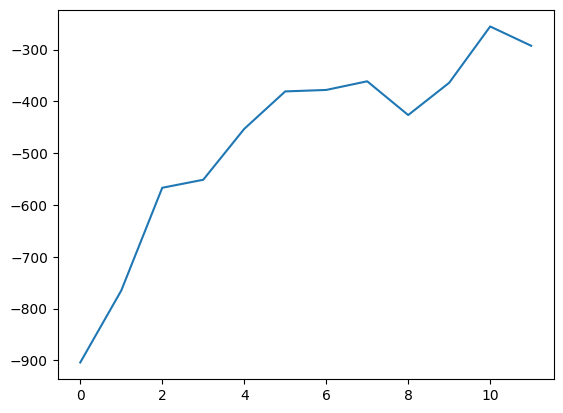

In [11]:
plt.plot(episodic_reward)

## Training Loss Plot

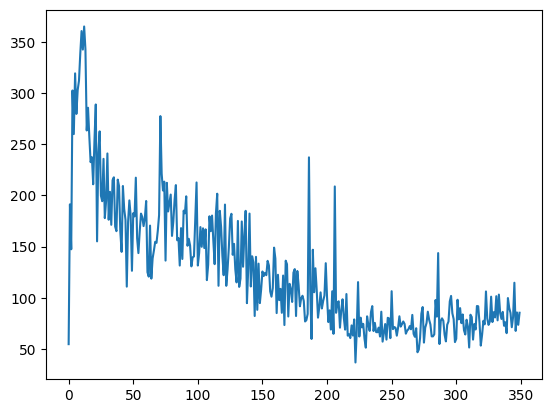

In [12]:
plt.plot(mean_loss)

# Testing Script

In [13]:
# Define the DQN agent class

class TestAgent:
    def __init__(self, state_size, action_size, buffer_size=10000):
        #print("Executing Init Function")
        self.state_size = state_size
        self.action_size = action_size
        # self.buffer = deque(maxlen=buffer_size)  # Replay memory
        # ''' Discount factor is kept closer to the 1 so that future bounus reward can be prefered.'''
        # self.gamma = 0.98 #0.98 # Discount factor 899
        # self.epsilon = 0.0  # Exploration rate
        # self.epsilon_min = 0.01
        # self.epsilon_decay = 0.01
        # self.learning_rate = 1e-4 #0.003 #0.004

        self.main_nn = DQN()
        #self.optimizer = tf.keras.optimizers.Adam(self.learning_rate)
        #self.mse = tf.keras.losses.MeanSquaredError()
        self.main_nn.build(input_shape = (None,self.state_size))
        self.load_model()




    def act(self,state):
          return tf.argmax(self.main_nn(state)[0]).numpy() # Greedy action for state.


    def load_model(self):
      # You need to load your new weight file name. For final testing
      # Best Model
      self.main_nn.load_weights("/content/drive/My Drive/Colab Notebooks/_final_simple_driving_DQN_8_350.h5")
      # Final Model
      #self.main_nn.load_weights("/content/drive/My Drive/Colab Notebooks/_final_simple_driving_DQN_7_250.h5")

agent = TestAgent(num_features, num_actions)
frames = []
# Training loop
episodes = 50    # Change this to 4000 after oen time testing at your end.

batch_size = 64  # you can increase it for more rigrous training.
                # or reduce the batch size to decrease training time. But it is almost suitable to run this.

mean_epi_reward = []
last_mean = -1000
episodic_reward = []
last_reward = []

act_list = []
mean_loss = []
step_count = 0
for e in range(episodes):
    #print("Total number of possible actions:", agent.action_size)
    s = env.reset()
    #state = state[:4]
    #state = state[0]
    state = s[0]

    episode_reward = 0
    done = False
    loss_value = []
    act_list = []
    for time in range(250):  # Adjust the maximum episode length as needed
        action = agent.act(np.asarray(state).reshape(1,-1))
        act_list.append(action)
        result = env.step(action)
        next_state, reward, done, _, _ = result  # Unpack the result, ignoring the additional dictionary
        episode_reward += reward
        state = next_state
        # No display for training.
        # ---------------------------------------- Comment This line before trainig -------------------------
        frames.append(env.render())
        #----------------------------------------------------------------------------------------------------
        if done:
            break

    #------------------------------------------------------------------------
    # Taking mean of episodic reward for seeing a stable reward progress over 25 episodes.
    # for more stable reward and higher number of episodes. running_mean_epi can be increased to 100
    print(act_list)

# ---------------------------------------- Comment This line before trainig -------------------------
display_video(frames, framerate=5)
#----------------------------------------------------------------------------------------------------

[6, 6, 6, 6, 6, 8, 6, 8, 6, 8, 6, 8, 6, 8, 6, 8, 6, 8, 6, 8, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1]
reached goal
[6, 6, 6, 6, 6, 8, 6, 8, 6, 8, 6, 8, 6, 6, 8, 8, 6, 8, 6, 7, 7, 7, 7, 7, 7]
reached goal
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 6, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7]
reached goal
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 6, 8, 6, 6, 8, 8, 6, 6, 8, 8, 6, 6, 8, 8, 6, 6, 7, 7, 7, 7, 7]
reached goal
[8, 8, 8, 8, 8, 8, 8, 6, 6, 8, 8, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7]
reached goal
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 6, 8, 6, 8, 6, 8, 6, 8, 6, 6, 7, 7, 7, 7, 7, 7, 7]
reached goal
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 6, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7]
reached goal
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 6, 8, 6